In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import sys
sys.path.insert(0,"../src/")

from linear_regression import *
from main import *

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


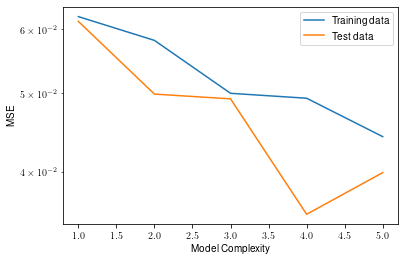

In [2]:

n = 100
degrees = np.arange(1, 5+1)
MSE_train = np.zeros(len(degrees))
MSE_test = np.zeros(len(degrees))


x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + np.random.normal(0, 1, n) * 0.2

for i, deg in enumerate(degrees):
    X = design_matrix_2D(x, y, deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.2)
    beta = OLS_SVD_2D(X_train, z_train)
    MSE_train[i] = MSE(z_train, X_train @ beta)
    MSE_test[i] = MSE(z_test, X_test @ beta)
    
    var_b = var_beta(z_train, X_train)

plt.semilogy(degrees, MSE_train, label = "Training data")
plt.semilogy(degrees, MSE_test, label = "Test data")
plt.xlabel("Model Complexity")
plt.ylabel("MSE")
plt.legend()

In [3]:
print(var_b) # for deg = 5

[ 0.59310974  5.75317267  6.23016799 24.92448631 24.87054976 26.16193139
 52.14498334 49.67234091 50.65435082 52.7465804  51.92399323 49.13439199
 49.75942499 49.1238562  50.84989841 19.6897222  19.56851297 19.89127754
 20.22045623 19.71073188 18.89633024]
